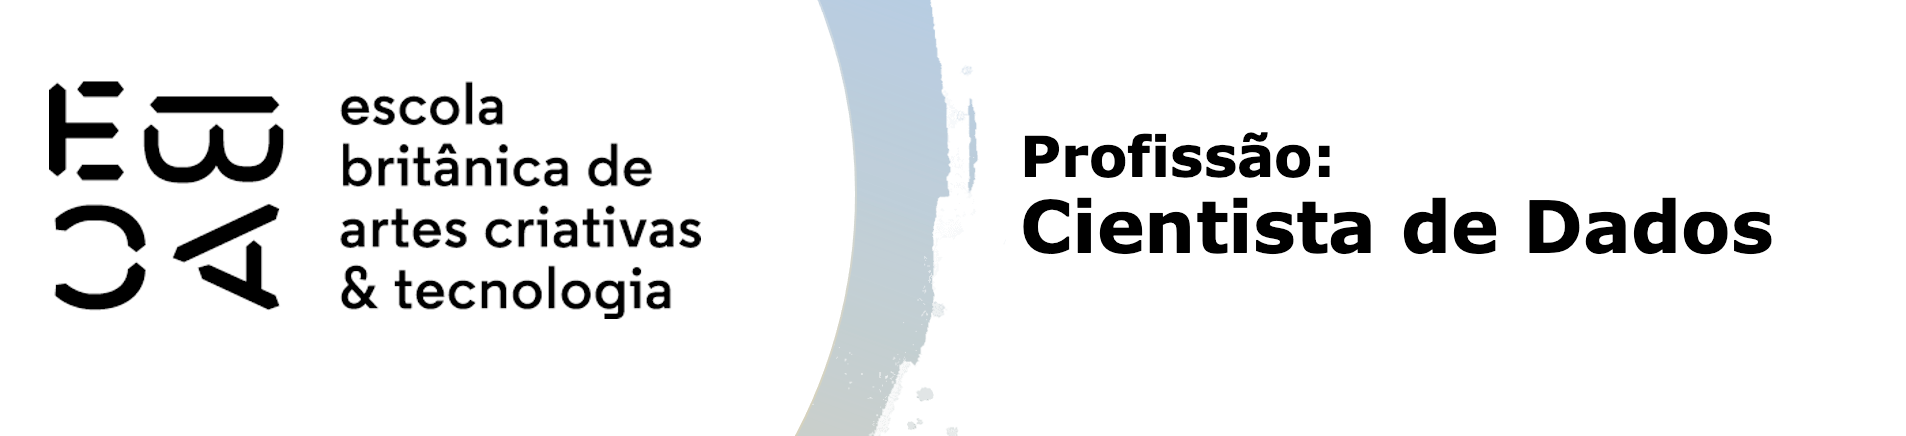

# Tarefa I

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import t, ks_2samp

from pycaret.classification import *


df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_ref               750000 non-null  datetime64[ns]
 1   index                  750000 non-null  int64         
 2   sexo                   750000 non-null  object        
 3   posse_de_veiculo       750000 non-null  object        
 4   posse_de_imovel        750000 non-null  object        
 5   qtd_filhos             750000 non-null  int64         
 6   tipo_renda             750000 non-null  object        
 7   educacao               750000 non-null  object        
 8   estado_civil           750000 non-null  object        
 9   tipo_residencia        750000 non-null  object        
 10  idade                  750000 non-null  int64         
 11  tempo_emprego          624043 non-null  float64       
 12  qt_pessoas_residencia  750000 non-null  floa

In [3]:
df.isna().sum() / df.shape[0]

data_ref                 0.000000
index                    0.000000
sexo                     0.000000
posse_de_veiculo         0.000000
posse_de_imovel          0.000000
qtd_filhos               0.000000
tipo_renda               0.000000
educacao                 0.000000
estado_civil             0.000000
tipo_residencia          0.000000
idade                    0.000000
tempo_emprego            0.167943
qt_pessoas_residencia    0.000000
renda                    0.000000
mau                      0.000000
dtype: float64

In [2]:
df_ = df.copy()
df_.tempo_emprego = df_.tempo_emprego.fillna(df_.tempo_emprego.mean())

## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [3]:
df_model = df_[df_['data_ref'] < '2016-01-01'].drop(columns=['data_ref','index'])
df_valid = df_[df_['data_ref'] > '2015-12-31'].drop(columns=['data_ref','index'])


## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [ ]:
df_.mau.value_counts()

In [ ]:
df_.mau.value_counts().plot.barh(title='Mau');

In [ ]:
df_.sexo.value_counts()

In [ ]:
df_.sexo.value_counts().plot.barh(title='sexo');

In [ ]:
df_.posse_de_veiculo.value_counts()

In [ ]:
df_.posse_de_veiculo.value_counts().plot.barh(title='posse_de_veiculo');

In [ ]:
df_.posse_de_imovel.value_counts()

In [ ]:
df_.posse_de_imovel.value_counts().plot.barh(title='posse_de_imovel');

In [ ]:
df_.qtd_filhos.value_counts()

In [ ]:
df_.qtd_filhos.value_counts().plot.bar(title='qtd_filhos');

In [ ]:
df_.tipo_renda.value_counts()

In [ ]:
df_.tipo_renda.value_counts().plot.barh(title='qtd_filhos');

In [ ]:
df_.educacao.value_counts()

In [ ]:
df_.educacao.value_counts().plot.barh(title='educacao');

In [ ]:
df_.estado_civil.value_counts()

In [ ]:
df_.estado_civil.value_counts().plot.barh(title='estado_civil');

In [ ]:
df_.tipo_residencia.value_counts()

In [ ]:
df_.tipo_residencia.value_counts().plot.barh(title='tipo_residencia');

In [ ]:
var = df_.idade
cat_srs = pd.qcut(var, 5, precision=0, duplicates='drop')
cat_srs.value_counts().sort_index()


In [ ]:
cat_srs.value_counts().sort_index().plot.barh(title='idade');

In [ ]:
var = df_.tempo_emprego
cat_srs = pd.qcut(var, 5, precision=2, duplicates='drop')
cat_srs.value_counts().sort_index()


In [ ]:
cat_srs.value_counts().sort_index().plot.barh(title='tempo_emprego');

In [ ]:
var = df_.qt_pessoas_residencia
cat_srs = pd.qcut(var, 5, precision=0, duplicates='drop')
cat_srs.value_counts().sort_index()


In [ ]:
cat_srs.value_counts().sort_index().plot.barh(title='qt_pessoas_residencia');

In [ ]:
var = df_.renda
cat_srs = pd.qcut(var, 4, precision=0, duplicates='drop')
cat_srs.value_counts().sort_index()


In [ ]:
cat_srs.value_counts().sort_index().plot.barh(title='renda');

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

In [ ]:
def bi_discreta(var, df):
    df['bom'] = 1-df.mau
    g = df.groupby(var)
        

    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                        'qt_mau': g['mau'].sum(),
                        'mau':g['mau'].mean(), 
                        'cont':g[var].count()})

    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep

    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_inf/(1-biv.mau_inf))

    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))

    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral

    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv.index, biv.woe, ':bo', label='woe')
    ax[0].plot(biv.index, biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv.index, biv.woe_inf, 'o:r', label='limite inferior')

    num_cat = biv.shape[0]

    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)

    ax[1] = biv.cont.plot.bar()
    
    return biv

In [ ]:
def bi_continua(var, df, ncat=5):
    df['bom'] = 1-df.mau
    cat_srs, bins = pd.qcut(df[var], ncat, retbins=True, precision=0, duplicates='drop')
    g = df.groupby(cat_srs)
        

    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                        'qt_mau': g['mau'].sum(),
                        'mau':g['mau'].mean(), 
                        var: g[var].mean(), 
                        'cont':g[var].count()})

    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep

    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_inf/(1-biv.mau_inf))

    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))

    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral

    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe, ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite inferior')

    num_cat = biv.shape[0]

    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)

    ax[1] = biv.cont.plot.bar()
    
    return biv

In [ ]:
bi_discreta('sexo',df_)

In [ ]:
bi_discreta('posse_de_veiculo',df_)

In [ ]:
bi_discreta('posse_de_imovel',df_)

In [ ]:
bi_discreta('qtd_filhos',df_)

In [ ]:
bi_discreta('tipo_renda',df_)

In [ ]:
bi_discreta('educacao',df_)

In [ ]:
bi_discreta('estado_civil',df_)

In [ ]:
bi_discreta('tipo_residencia',df_)

In [ ]:
bi_continua('idade',df=df_)

In [ ]:
bi_continua('tempo_emprego',df_)

In [ ]:
bi_continua('qt_pessoas_residencia',df_)

In [ ]:
bi_continua('renda',df_)

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [30]:
df_model = df_[df_['data_ref'] < '2016-01-01'].drop(columns=['data_ref','index'])
df_valid = df_[df_['data_ref'] > '2015-12-31'].drop(columns=['data_ref','index'])

In [4]:
df_model = pd.get_dummies(df_model)

In [32]:
y = df_model['mau'].astype('int')
X = df_model.drop(columns='mau')

reg = sm.Logit(y,X).fit()
reg.summary()


Optimization terminated successfully.
         Current function value: 0.208136
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    mau   No. Observations:               600000
Model:                          Logit   Df Residuals:                   599974
Method:                           MLE   Df Model:                           25
Date:                Tue, 19 Sep 2023   Pseudo R-squ.:                 0.09469
Time:                        17:37:40   Log-Likelihood:            -1.2488e+05
converged:                       True   LL-Null:                   -1.3794e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
qtd_filhos                        0.1269      0.090      1.417      0.156      -0.049       0.302
idade                          9.477e-05      0.001      0.135      0.893      -0.001       0.001
tempo_emprego                    -0.0237      0.002    -13.133      0.000      -0.027      -0.020
qt_pessoas_residencia            -0.1237      0.089     -1.384      0.166      -0.299       0.051
renda                            -0.0001   1.09e-06    -93.637      0.000      -0.000   -9.95e-05
sexo_F                           -0.2461        nan        nan        nan         nan         nan
sexo_M                           -0.3724        nan        nan        nan         nan         nan
posse_de_veiculo_N               -0.3252   3.08e+05  -1.06e-06      1.000   -6.03e+05    6.03e+05
posse_de_veiculo_S               -0.2933   3.01e+05  -9.75e-07      1.000    -5.9e+05     5.9e+05
posse_de_imovel_N                -0.2664   3.65e+05   -7.3e-07      1.000   -7.15e+05    7.15e+05
posse_de_imovel_S                -0.3521   3.65e+05  -9.63e-07      1.000   -7.16e+05    7.16e+05
tipo_renda_Assalariado           -0.1238        nan        nan        nan         nan         nan
tipo_renda_Bolsista               0.0013        nan        nan        nan         nan         nan
tipo_renda_Empresário            -0.1769        nan        nan        nan         nan         nan
tipo_renda_Pensionista           -0.1635        nan        nan        nan         nan         nan
tipo_renda_Servidor público      -0.1556        nan        nan        nan         nan         nan
educacao_Fundamental             -0.0742   3.45e+04  -2.15e-06      1.000   -6.77e+04    6.77e+04
educacao_Médio                   -0.1047   7.11e+04  -1.47e-06      1.000   -1.39e+05    1.39e+05
educacao_Pós graduação           -0.1202   6.44e+04  -1.87e-06      1.000   -1.26e+05    1.26e+05
educacao_Superior completo       -0.1649   5.51e+04  -2.99e-06      1.000   -1.08e+05    1.08e+05
educacao_Superior incompleto     -0.1545   4.42e+04  -3.49e-06      1.000   -8.67e+04    8.67e+04
estado_civil_Casado              -0.0614        nan        nan        nan         nan         nan
estado_civil_Separado            -0.1470        nan        nan        nan         nan         nan
estado_civil_Solteiro            -0.1775        nan        nan        nan         nan         nan
estado_civil_União               -0.0139        nan        nan        nan         nan         nan
estado_civil_Viúvo               -0.2187        nan        nan        nan         nan         nan
tipo_residencia_Aluguel          -0.0325    1.7e+05  -1.91e-07      1.000   -3.34e+05    3.34e+05
tipo_residencia_Casa             -0.1217    1.7e+05  -7.14e-07      1.000   -3.34e+05    3.34e+05
tipo_residencia_Com os pais      -0.1068    1.7e+05  -6.27e-07      1.000   -3.34e+05    3.34e+05
tipo_residencia_Comunitário      -0.1727    1.7e+05  -1.01e-06      1.000   -3.34e+05    3.34e+05
tipo_re

In [17]:
col_a = ['tempo_emprego','renda','estado_civil_Casado','estado_civil_Separado',
         'estado_civil_Solteiro','estado_civil_União','estado_civil_Viúvo']

In [18]:
y = df_model['mau']
X = df_model[col_a]

reg = sm.Logit(y,X).fit()
reg.summary()


Optimization terminated successfully.
         Current function value: 0.208289
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    mau   No. Observations:               600000
Model:                          Logit   Df Residuals:                   599993
Method:                           MLE   Df Model:                            6
Date:                Tue, 19 Sep 2023   Pseudo R-squ.:                 0.09403
Time:                        17:28:06   Log-Likelihood:            -1.2497e+05
converged:                       True   LL-Null:                   -1.3794e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
tempo_emprego            -0.0223      0.002    -13.332      0.000      -0.026      -0.019
renda                    -0.0001   1.08e-06    -96.139      0.000      -0.000      -0.000
estado_civil_Casado      -1.6078      0.012   -139.761      0.000      -1.630      -1.585
estado_civil_Separado    -1.5551      0.024    -64.200      0.000      -1.603      -1.508
estado_civil_Solteiro    -1.6034      0.018    -90.803      0.000      -1.638      -1.569
estado_civil_União       -1.5498      0.021    -73.987      0.000      -1.591      -1.509
estado_civil_Viúvo       -1.6168      0.029    -55.127      0.000      -1.674      -1.559
=========================================================================================
"""

In [5]:
y = df_model['mau']
X = df_model[['tempo_emprego','renda']]

reg = sm.Logit(y,X).fit()
reg.summary()


Optimization terminated successfully.
         Current function value: 0.228002
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    mau   No. Observations:               600000
Model:                          Logit   Df Residuals:                   599998
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Oct 2023   Pseudo R-squ.:                0.008281
Time:                        13:38:50   Log-Likelihood:            -1.3680e+05
converged:                       True   LL-Null:                   -1.3794e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
tempo_emprego    -0.1779      0.001   -122.793      0.000      -0.181      -0.175
renda            -0.0002   1.19e-06   -163.008      0.000      -0.000      -0.000
=================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [39]:
y = df_model['mau']
X = df_model[['tempo_emprego','renda']]

reg = LogisticRegression().fit(X,y)
pred = reg.predict(df_valid[['tempo_emprego','renda']])
metrics.accuracy_score(df_valid['mau'].astype('int'),pred.astype('int'))


0.8533333333333334

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [17]:
def plot_roc_curve(y, y_pred, gini, ks):
    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    fig = plt.figure()
    plt.plot(fpr, tpr, 'b--', label='%s AUC = %0.4f, GINI = %0.2f, KS = %s' % ('Model: ', roc_auc, gini, ks))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=0, fontsize='small')
    plt.show()

In [10]:
pred = reg.predict(df_valid[['tempo_emprego','renda']])

Accuracy score : 0.85,
GINI : 0.00,
KS : 0.15


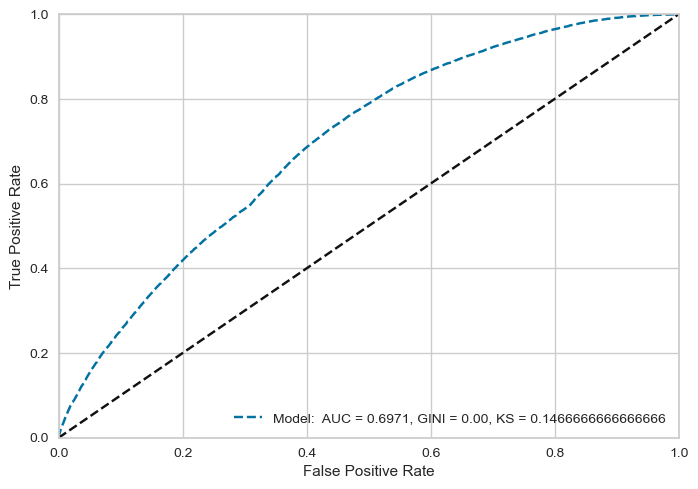

In [32]:
accrc = metrics.accuracy_score(df_valid['mau'].astype('int'),pred.astype('int'))
gini = 2 * metrics.roc_auc_score(df_valid['mau'].astype('int'),pred.astype('int')) - 1
ks = ks_2samp(df_valid['mau'].astype('int'),pred.astype('int')).statistic
print(f'Accuracy score : {accrc:.2f}\nGINI : {gini:.2f}\nKS : {ks:.2f}')
plot_roc_curve(df_valid['mau'], pred,gini,ks)

# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

In [20]:
# DÚVIDA 1
# COMO ADICIONAR O TRATAMENTO DE VARIÁVEIS NAN AO PIPELINE (STEPS DO PIPELINE) ???
def cat_nan(df):
    cats = df.columns
    
    for cat in cats:
        if df[cat].isna().sum() > 0:
            if df[cat].dtype != 'object' and df[cat].dtype != '<M8[ns]':
                df[cat] = df[cat].fillna(df[cat].mean())
    return df
            
            

### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

In [76]:
# NÃO HÁ A NECESSIDADE DE REMOVER OUTLIERS

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

In [77]:
# SÃO SELECIONADAS AS VARIÁVEIS QUE APRESENTAM UM P VALUE MENOR QUE 0.05

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [78]:
# NÃO HÁ NECESSIDADE DA UTILIZAÇÃO DO PCA 

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [ ]:
# NÃO HÁ NECESSIDADE DA CRIAÇÃO DE VARIÁVEIS DUMMIES

### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [21]:
class NaNImput(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):

        return self

    def transform(self, X, y=None):

        return cat_nan(X)
    
    
    
    
class LogitWrapper(BaseEstimator, TransformerMixin):

    def fit(self, X, y):

        self.model = sm.Logit(y, X)

        self.result = self.model.fit()

        return self
    
    def transform(self, X, y=None):

        return self.result.predict(X)

    def predict(self, X):

        return self.transform(X)

In [44]:
steps = [
    ('nan_treat',NaNImput()),
    ('logit', LogitWrapper())
]

ppln = Pipeline(steps=steps)


In [47]:
reg_ppln = ppln.fit(X,y)

predict_ppln = reg_ppln.predict(df_valid[['tempo_emprego','renda']])


Optimization terminated successfully.
         Current function value: 0.228002
         Iterations 11


In [49]:
metrics.accuracy_score(df_valid['mau'].astype('int'),predict_ppln.astype('int'))

0.8533333333333334

# b - Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [3]:
df_model = df_[df_['data_ref'] < '2016-01-01'].drop(columns=['data_ref','index'])
df_valid = df_[df_['data_ref'] > '2015-12-31'].drop(columns=['data_ref','index'])

In [25]:
df_pycaret = df_.drop(columns=['data_ref','index'])


In [26]:
exp_pycaret = setup(data=df_pycaret, target= 'mau', experiment_name= 'credit38', 
                   normalize= True, normalize_method='zscore', transformation=True,
                  transformation_method='quantile', fix_imbalance=True,)

,Description,Value
0,Session id,5779
1,Target,mau
2,Target type,Binary
3,Original data shape,"(750000, 13)"
4,Transformed data shape,"(1192900, 30)"
5,Transformed train set shape,"(967900, 30)"
6,Transformed test set shape,"(225000, 30)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,7


In [ ]:
models().

In [ ]:
xxx = create_model('xxx')

In [27]:
best_model = compare_models(n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9218,0.6172,0.0000,0.0000,0.0000,0.0000,0.0000,8.8640
dummy,Dummy Classifier,0.9218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0040
xgboost,Extreme Gradient Boosting,0.9067,0.7754,0.1963,0.3349,0.2475,0.2013,0.2095,18.2260
lightgbm,Light Gradient Boosting Machine,0.9057,0.7799,0.2163,0.3385,0.2639,0.2161,0.2224,16.3500
knn,K Neighbors Classifier,0.9048,0.6392,0.1067,0.2477,0.1491,0.1071,0.1179,231.8080
gbc,Gradient Boosting Classifier,0.8968,0.7765,0.2631,0.3111,0.2850,0.2299,0.2308,156.2600
ada,Ada Boost Classifier,0.8930,0.7624,0.2863,0.3043,0.2949,0.2371,0.2373,36.3430
et,Extra Trees Classifier,0.8922,0.6059,0.1353,0.2086,0.1642,0.1093,0.1123,56.6190
dt,Decision Tree Classifier,0.8915,0.6017,0.1375,0.2077,0.1655,0.1100,0.1127,11.2070
rf,Random Forest Classifier,0.8888,0.6654,0.1522,0.2096,0.1763,0.1183,0.1201,66.9780


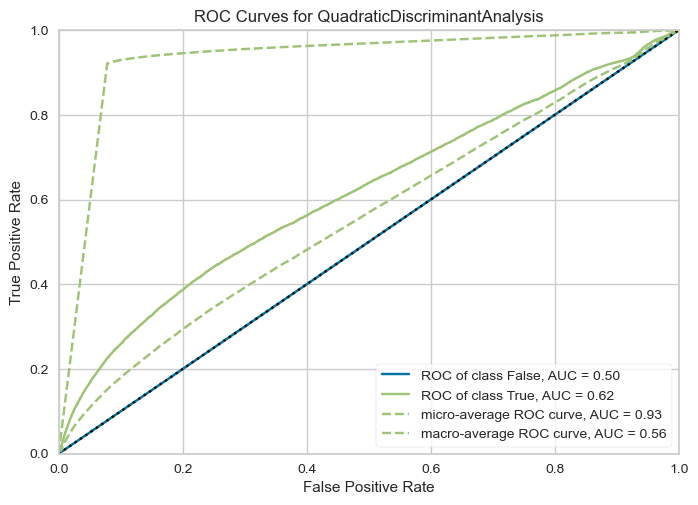

In [38]:
plot_model(best_model)

In [28]:
save_model(best_model,'Quadratic Discriminant Analysis Model mod38 ex1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_im...
                                         

In [29]:
model_saved = load_model('Quadratic Discriminant Analysis Model mod38 ex1')

Transformation Pipeline and Model Successfully Loaded


In [63]:
model_saved.named_steps

{'numerical_imputer': TransformerWrapper(exclude=None,
                    include=['index', 'qtd_filhos', 'idade', 'tempo_emprego',
                             'qt_pessoas_residencia', 'renda', 'sexo_F',
                             'sexo_M', 'posse_de_veiculo_N',
                             'posse_de_veiculo_S', 'posse_de_imovel_N',
                             'posse_de_imovel_S', 'tipo_renda_Assalariado',
                             'tipo_renda_Bolsista', 'tipo_renda_Empresário',
                             'tipo_renda_Pensionista',
                             'tipo_renda_Servidor público',
                             'educac...
                             'educacao_Superior incompleto',
                             'estado_civil_Casado', 'estado_civil_Separado',
                             'estado_civil_Solteiro', 'estado_civil_União',
                             'estado_civil_Viúvo', 'tipo_residencia_Aluguel',
                             'tipo_residencia_Casa',
        

In [34]:
predict_model(model_saved, data = df_valid.drop(columns='mau'))

0.14666666666666667